https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e

# gym interface

Each environment must implement the following *gym* interface:



```python
import gym
from gym import spaces

class CustomEnv(gym.Env):
  """Custom Environment that follows gym interface"""
  metadata = {'render.modes': ['human']}

  def __init__(self, arg1, arg2, ...):
    super(CustomEnv, self).__init__()    # Define action and observation space
    # They must be gym.spaces objects    # Example when using discrete actions:
    self.action_space = spaces.Discrete(N_DISCRETE_ACTIONS)    # Example for using image as input:
    self.observation_space = spaces.Box(low=0, high=255, shape=
                    (HEIGHT, WIDTH, N_CHANNELS), dtype=np.uint8)

  def step(self, action):
    # Execute one time step within the environment
      
    
  def reset(self):
    # Reset the state of the environment to an initial state
      
    
  def render(self, mode='human', close=False):
    # Render the environment to the screen
    
```

# house made goldmine - discrete mode

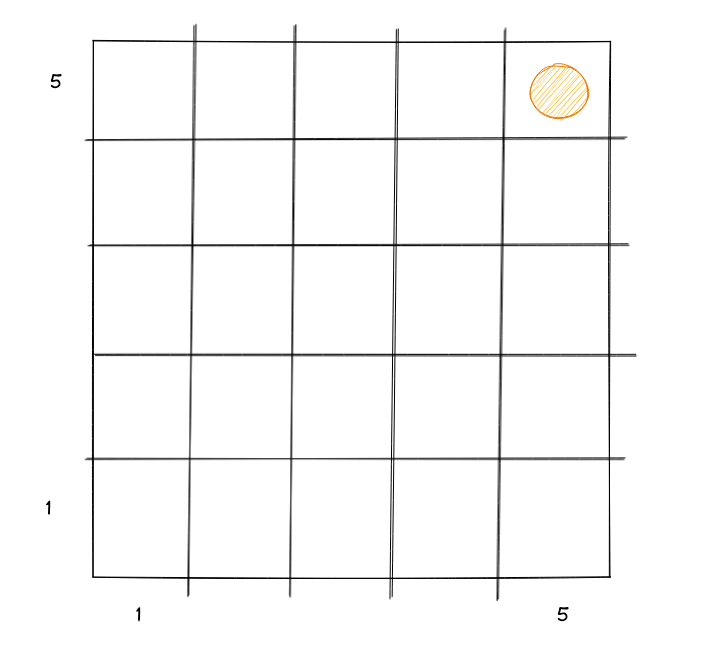

In [1]:
import gym
from gym import spaces
import random

class GoldMine(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self):
        super(GoldMine, self).__init__()
        #actions: move on the grid, by 1 in any direction: N, S, W, E. Or stay at same position
        #0 - N, 1 - S, 2 - W, 3 - E, 4 - no move
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(5),
            spaces.Discrete(5)
            ))
    
    def reset(self):
        self.current_position = self.observation_space.sample()
        self.global_reward = 0
        print(f'reset at position {self.current_position}')
        return self.current_position
        
    def step(self, action):
        if (action == 0) & (self.current_position[1] < 4):
            self.current_position = ( self.current_position[0],  self.current_position[1]+1)
        if (action == 1) & (self.current_position[1] > 0):
            self.current_position = ( self.current_position[0],  self.current_position[1]-1)
        if (action == 2) & (self.current_position[0] > 0):
            self.current_position = ( self.current_position[0]-1,  self.current_position[1])
        if (action == 3) & (self.current_position[0] < 4):
            self.current_position = ( self.current_position[0]+1,  self.current_position[1])
        reward = -1
        done = False
        if self.current_position == (4,4):
            reward = 10
            done = True
        self.global_reward += reward
        return self.current_position, reward, done, {}
            
    
    def render(self):
        print(f'position {self.current_position}, done {done}, global_reward {self.global_reward}')
            
        

In [3]:
env = GoldMine()
env.reset()
for i in range(100):
    action = env.action_space.sample()
    obs, rewards, done, info = env.step(action)
    env.render()
    if done: env.reset()

    

reset at position (3, 0)
position (3, 0), done False, global_reward -1
position (3, 0), done False, global_reward -2
position (4, 0), done False, global_reward -3
position (3, 0), done False, global_reward -4
position (3, 0), done False, global_reward -5
position (4, 0), done False, global_reward -6
position (4, 0), done False, global_reward -7
position (4, 0), done False, global_reward -8
position (4, 0), done False, global_reward -9
position (4, 0), done False, global_reward -10
position (4, 0), done False, global_reward -11
position (4, 0), done False, global_reward -12
position (4, 0), done False, global_reward -13
position (4, 0), done False, global_reward -14
position (4, 0), done False, global_reward -15
position (4, 1), done False, global_reward -16
position (4, 2), done False, global_reward -17
position (4, 3), done False, global_reward -18
position (4, 2), done False, global_reward -19
position (4, 2), done False, global_reward -20
position (4, 3), done False, global_reward -

In [4]:
import stable_baselines3
from stable_baselines3.common.env_checker import check_env

check_env(env)

reset at position (2, 2)


/home/explore/miniconda3/envs/stablebaselines3/lib/python3.7/site-packages/stable_baselines3/common/env_checker.py:62: UserWarning: The observation space is a Tuple,this is currently not supported by Stable Baselines (cf https://github.com/hill-a/stable-baselines/issues/133), you will need to flatten the observation and maybe use a custom policy. 
  "The observation space is a Tuple,"


In [5]:
from stable_baselines3 import DQN

model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=4)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


NotImplementedError: Tuple(Discrete(5), Discrete(5)) observation space is not supported

In [6]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(5)
State Space Tuple(Discrete(5), Discrete(5))


## solve it with Q-learning

https://medium.com/swlh/introduction-to-q-learning-with-openai-gym-2d794da10f3d

In [134]:
import numpy as np
Q = np.zeros((env.observation_space.n, env.action_space.n))

AttributeError: 'Tuple' object has no attribute 'n'